# **Project : Bank Churn Prediction**

**Name**: Reena Rajendra Prasad

**Github Link** : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/PROJECT%20Bank%20Churn_DNN_Reena.ipynb 


**Objective:**
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Context:**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Data Dictionary**:

*RowNumber*: Row number.

*CustomerId*: Unique identification key for different customers.

*Surname*: Surname of the customer

*Credit Score*: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

*Geography *: The country to which the customer belongs.

*Gender*: The gender of the customer.

*Age*: Age of the customer.

*Tenure*: The period of time a customer has been associated with the bank.

*Balance*: The account balance (the amount of money deposited in the bank account) of the customer.

*NumOfProducts*: How many accounts, bank account affiliated products the person has.

*HasCrCard*: Does the customer have a credit card through the bank?

*IsActiveMember*: Subjective, but for the concept

*EstimatedSalary*: Estimated salary of the customer.

*Exited*: Did they leave the bank after all?

**Import  Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Read the dataSet
df=pd.read_csv('/content/drive/MyDrive/AIML/bank.csv')

**Overview of Data**


In [4]:
#Shape of the   data
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# 5 point summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
#Deleting  the  RowNumber column as it will not  add value to the model
df.drop('RowNumber', axis=1, inplace=True)

In [8]:
#Check for the data duplication 
df_dup=df.duplicated()
df_dup= pd.DataFrame(df_dup)
df[df_dup[0]==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
df['CustomerId'].nunique()

10000

In [10]:
# Delete  The  customerid column and  Surname    column  as it  be different for all customers
df_new= df.drop(['CustomerId','Surname'], axis=1)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
#Find unique values of the Geography 
df_new['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
#Get unique values in Gender columns
df_new['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Univariate Analysis

In [14]:
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

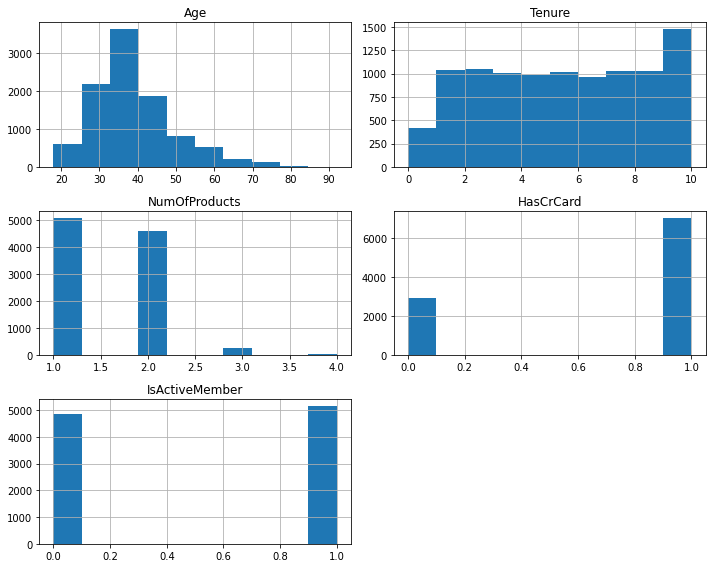

In [15]:
df_new[['Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].hist(figsize=(10,8))
plt.tight_layout()

**Bivariate Analysis**

In [16]:
df_new['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

**Insights** : Unbalanced datset  with 80% in Churned and 20% in  Retained category

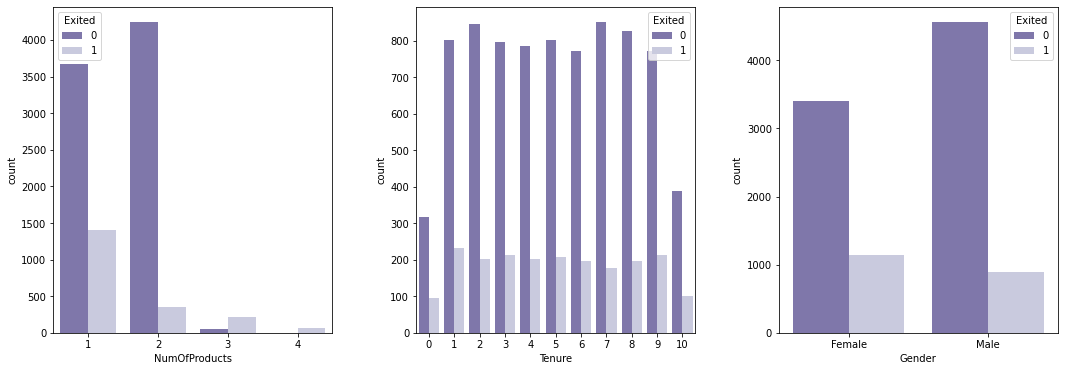

In [17]:
p, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x=df_new['NumOfProducts'],hue=df_new['Exited'],palette='Purples_r',ax=ax[0])
sns.countplot(x=df_new['Tenure'],hue=df_new['Exited'],palette='Purples_r',ax=ax[1])
sns.countplot(x=df_new['Gender'],hue=df_new['Exited'],palette='Purples_r',ax=ax[2])

In [18]:
#Relation between Churned  and Gender
df_new.groupby('Gender')['Exited'].value_counts(normalize=True)

Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: Exited, dtype: float64

In [19]:
#Relation between Churned  and Number of products
df_new.groupby('NumOfProducts')['Exited'].value_counts(normalize=True)

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: Exited, dtype: float64

In [20]:
#Relation between Churned  and Number of products
df_new.groupby('Tenure')['Exited'].value_counts(normalize=True)

Tenure  Exited
0       0         0.769976
        1         0.230024
1       0         0.775845
        1         0.224155
2       0         0.808206
        1         0.191794
3       0         0.788900
        1         0.211100
4       0         0.794742
        1         0.205258
5       0         0.793478
        1         0.206522
6       0         0.797311
        1         0.202689
7       0         0.827821
        1         0.172179
8       0         0.807805
        1         0.192195
9       0         0.783537
        1         0.216463
10      0         0.793878
        1         0.206122
Name: Exited, dtype: float64

**Insights :**
*  Churn rates are higher for the cutomers with less number of products
*  Churn rates remains around 20% in all Tenure
*  Churn rates are  higher for females 25% compared to males 16%


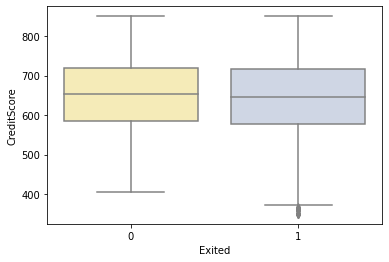

In [21]:
sns.boxplot(y=df_new['CreditScore'],x=df_new['Exited'],palette='Pastel2_r')

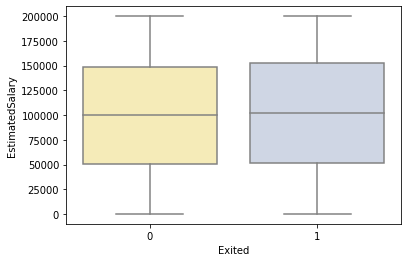

In [22]:
sns.boxplot(y=df_new['EstimatedSalary'],x=df_new['Exited'],palette='Pastel2_r')

**Insights from BoxPlot** : Outliers in the Creditcard score but  that should be a normal scenario

**Multivariate Analysis**

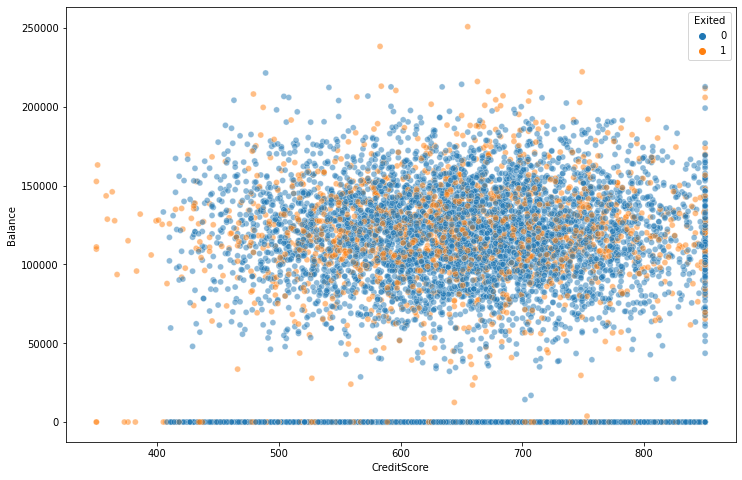

In [23]:
# Creditsocre and Balance
plt.figure(figsize=(12,8))
sns.scatterplot(x='CreditScore',y='Balance',data=df_new,hue='Exited',alpha=.5)

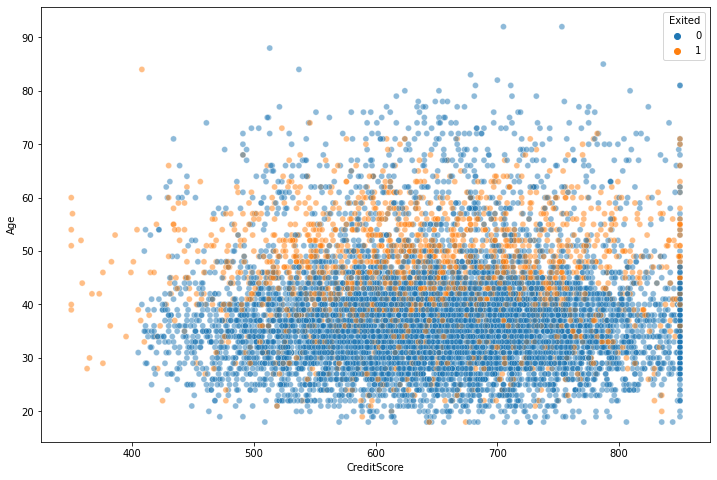

In [24]:
# Age and Creditscore
plt.figure(figsize=(12,8))
sns.scatterplot(x='CreditScore',y='Age',data=df_new,hue='Exited',alpha=.5)

**Insights** :
*   Customers with low credit score(less than 400) always Exited
*   Churn rates were higher between Age 40 and 60 



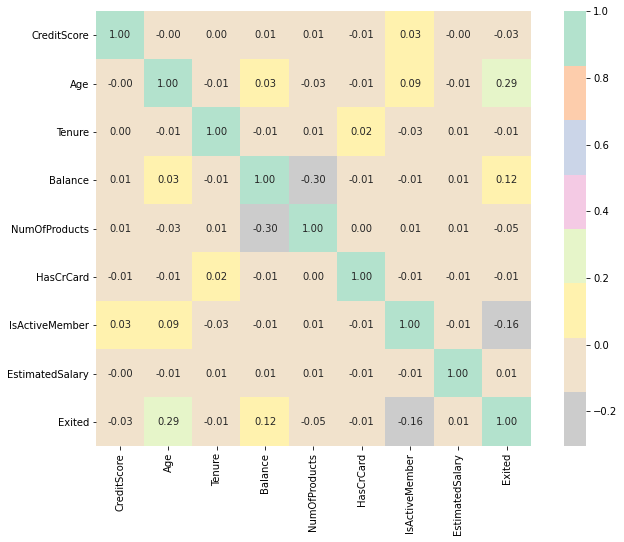

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(), annot=True,fmt='.2f',square=True,cmap='Pastel2_r')
plt.show()

In [26]:
df_new.corr()>.5

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,True,False,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False,False
Tenure,False,False,True,False,False,False,False,False,False
Balance,False,False,False,True,False,False,False,False,False
NumOfProducts,False,False,False,False,True,False,False,False,False
HasCrCard,False,False,False,False,False,True,False,False,False
IsActiveMember,False,False,False,False,False,False,True,False,False
EstimatedSalary,False,False,False,False,False,False,False,True,False
Exited,False,False,False,False,False,False,False,False,True


##  Insights from Heatmap 

*   No high correlation between features can be observed here



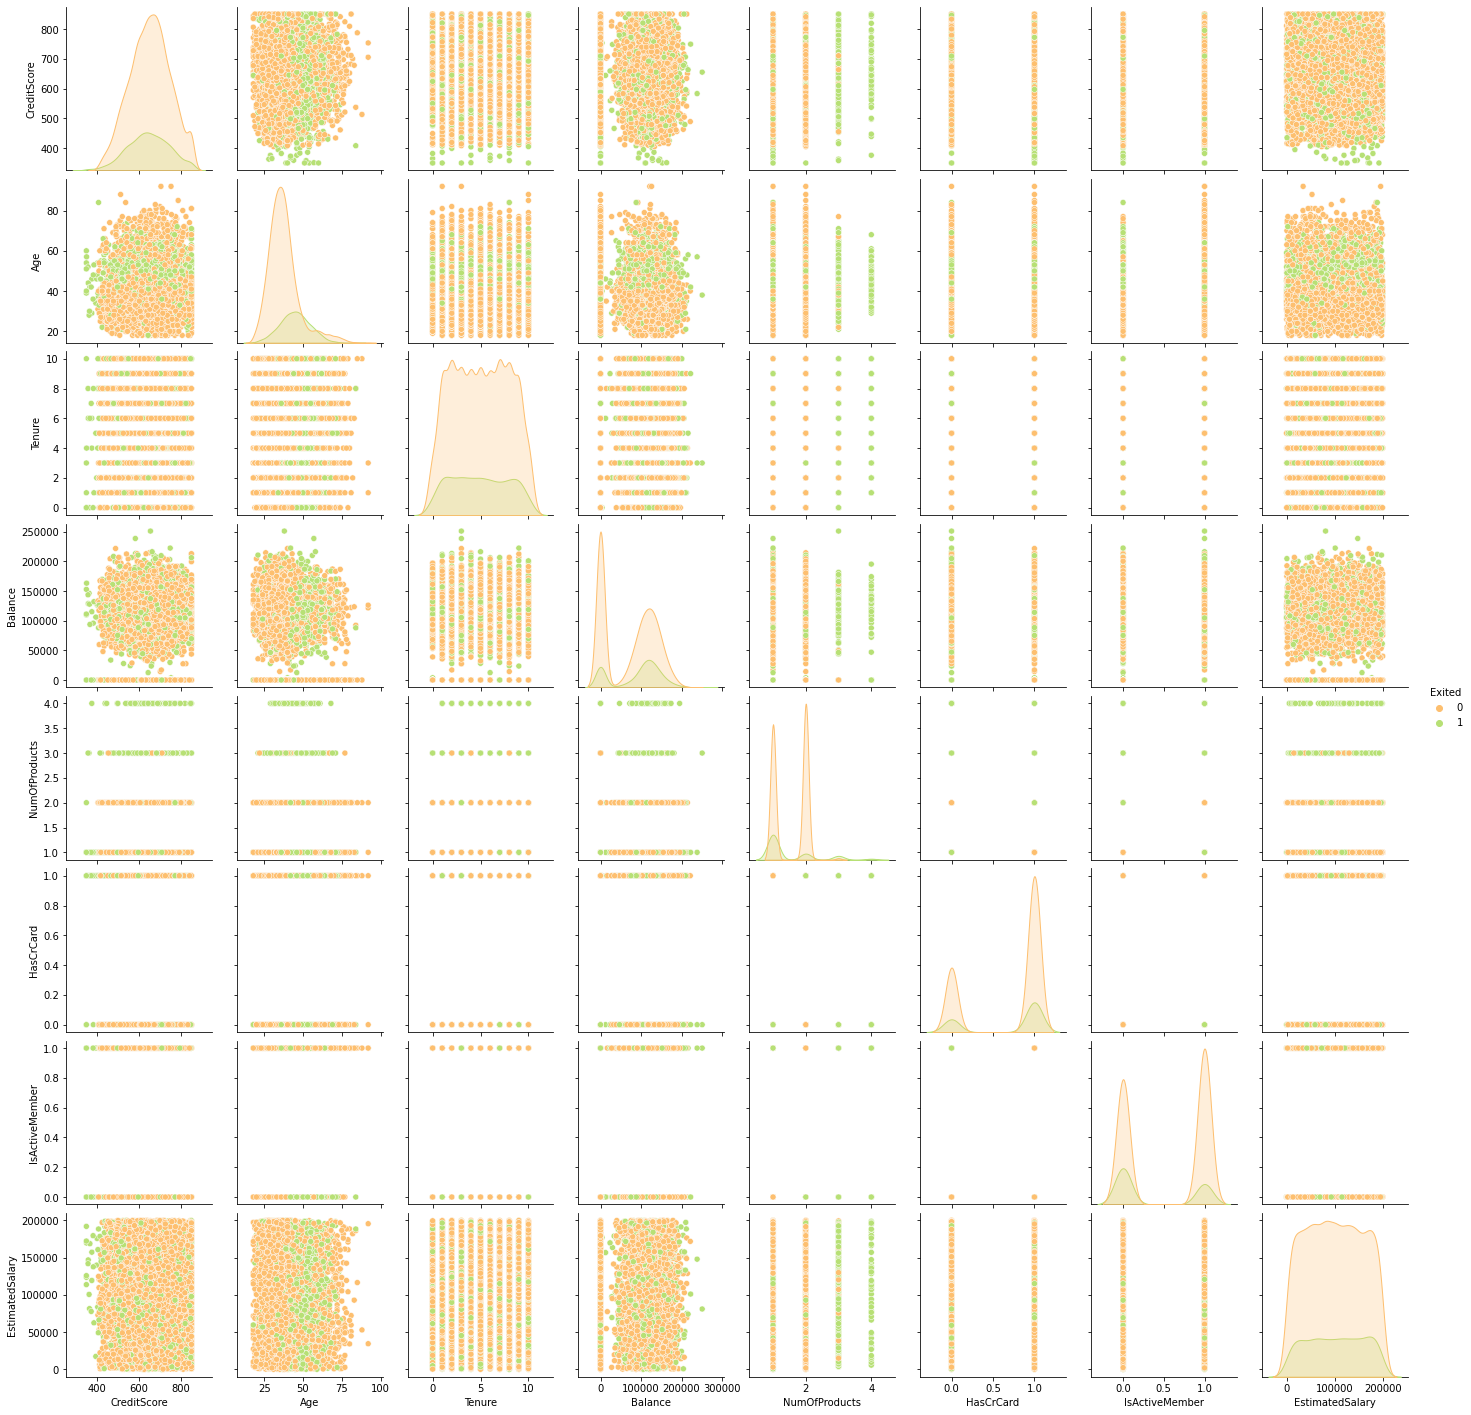

In [27]:
sns.pairplot(df_new,palette='RdYlGn',diag_kind='kde',hue='Exited')

**Convert Categorical with one Hot Encoding and Convert to float**

In [28]:
#creating dummy variables for the categorical features
df_float = pd.get_dummies(df_new)
df_float = df_float.astype('float32')
df_float

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


**Split Train and Test Data**

In [29]:
X= df_float.drop('Exited',axis=1)
y=df_float['Exited']
print("X", X.shape)
print("Y", y.shape)

X (10000, 13)
Y (10000,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Normalize the train and test data using StandardScaler**

In [31]:
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[0.58800006, 0.25675675, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.26200002, 0.28378376, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.65999997, 0.25675675, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64400005, 0.36486486, 0.90000004, ..., 0.        , 1.        ,
        0.        ],
       [0.62600005, 0.28378376, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.826     , 0.32432434, 0.6       , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

**Initialize Model & Add Layers**

In [33]:
model= Sequential()

# Add first dense Layer with elu activation
model.add(Dense(39, input_shape = (13,), activation = 'elu'))
# Add Second dense Layer with relu activation
model.add(Dense(26, activation = 'relu'))
#As for the Binary classification  Add Single neuron in the output Layer  and sigmoid activation function
model.add(Dense(1,activation = 'sigmoid'))

In [34]:
#Optimizer
sgd = tf.keras.optimizers.Adam(lr = 0.001)

In [35]:
#compile the Model
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 39)                546       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 1,613
Trainable params: 1,613
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Fit the Model
model.fit(X_train, y_train.values, batch_size = 700, epochs = 20, verbose = 1)

Epoch 1/20
10/10 [==============================] - 1s 5ms/step - loss: 0.7026 - accuracy: 0.4815
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.7933
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7962
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7948
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7966
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7973
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8057
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8009
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8042
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8012
Epoch 11/20
10/10 [

**Observations**: Accuracy of the above  model is 80%


**Steps taken  to improve the above model**


1.   Changed the number of neurons in the input layer to same as  number of features
2.   In the hidden layer number of neurons modified to a number less than the inputs  and outputs( 8 in first layer ,4 in the second hidden layer)
3. All Activaion functions changed to relu
4. Learning rate chnaged to .01 from .001 in the first model
5. The batch size reduced to 50 
6. Added one more hidden layer




In [38]:
model2= Sequential()

# Add first dense Layer with elu activation
model2.add(Dense(13, input_shape = (13,), activation = 'relu'))
# Add Second dense Layer with relu activation
model2.add(Dense(8, activation = 'relu'))
# Add third dense Layer with relu activation
model2.add(Dense(4, activation = 'relu'))
#As for the Binary classification  Add Single neuron in the output Layer  and Sigmoid activation function
model2.add(Dense(1,activation = 'sigmoid'))

In [39]:
#Optimizer
sgd = tf.keras.optimizers.Adam(lr = 0.01)

In [59]:
#compile the Model
model2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [60]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Fit the Model
model2.fit(X_train, y_train.values, batch_size = 50, epochs = 20, verbose = 1)

Epoch 1/20
140/140 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8685
Epoch 2/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8615
Epoch 3/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8575
Epoch 4/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8616
Epoch 5/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8612
Epoch 6/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8606
Epoch 7/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8617
Epoch 8/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8558
Epoch 9/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8676
Epoch 10/20
140/140 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8654

**The changes done to first model has increased accuracy from 80 % to 86 % in the second model**

In [43]:
y_predict = model2.predict(X_test)

In [44]:
y_predict

array([[0.08221105],
       [0.14555463],
       [0.1276148 ],
       ...,
       [0.09514868],
       [0.1597124 ],
       [0.18290669]], dtype=float32)

**Predict the results using 0.5 as a threshold**

In [45]:
y_Pred_threshold=y_predict>0.5

In [46]:
y_Pred_threshold = y_Pred_threshold.astype(int)

In [47]:
dPred=  pd.DataFrame(y_Pred_threshold,columns=['PredictedVal'])
dPred[dPred['PredictedVal']>0]

,PredictedVal
19,1
26,1
33,1
37,1
41,1
...,...
2976,1
2977,1
2986,1
2989,1


In [48]:
dPred.shape

(3000, 1)

In [49]:
model2.evaluate(X_test,y_test.values)

94/94 [==============================] - 0s 902us/step - loss: 0.3405 - accuracy: 0.8613


[0.34047043323516846, 0.8613333106040955]

**Accuracy and Threshold values using .5 threshold**

In [50]:
from sklearn import metrics
print("Model Accuracy with 0.5 Threshold >>",metrics.accuracy_score(y_test, y_Pred_threshold))

Model Accuracy with 0.5 Threshold >> 0.8613333333333333


In [51]:
#Confusion  matrix with 0.5 Threshold
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_Pred_threshold)
print(cm)

[[2232  141]
 [ 275  352]]


In [52]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] ,cmap='Greens')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

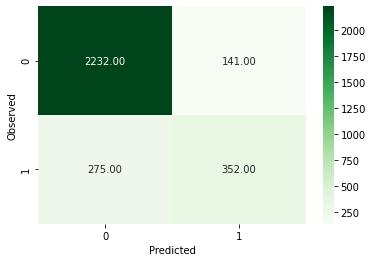

In [53]:
##Confusion matrix ,heatmap representation
draw_cm(y_test,y_Pred_threshold)

**Setting Threshold of 0.5 using Keras model**

In [55]:
 mdlacc = tf.keras.metrics.BinaryAccuracy( name="binary_accuracy", dtype=None, threshold=0.5)
 mdlacc.update_state(y_test, y_predict)
print("Accuracy 0.5 threshold >> ", mdlacc.result().numpy())

Accuracy 0.5 threshold >>  0.8613333


**Recall**

In [62]:
recall_sc=metrics.recall_score(y_test,y_Pred_threshold)
print(recall_sc)

0.5614035087719298
